<a href="https://colab.research.google.com/github/DIPANJAN001/Andrew-Ng-Machine-Learning-Notes/blob/master/RDF_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
!pip install rdflib

In [52]:
import random
from rdflib import Graph, Namespace, Literal

In [53]:
import random

colleagues = ["srishti", "parth", "satyam", "rounak", "pranab", "balaji", "sai", "pritam", "hareesh", "saurav"]
projects = ["kg", "nixx", "litigation"]

g = Graph()


ex = Namespace("http://example.org/")


for colleague in colleagues:



    manager = random.choice(colleagues)
    while manager == colleague:
        manager = random.choice(colleagues)

    work_with = random.choice(colleagues)
    while work_with == colleague:
        work_with = random.choice(colleagues)

    sit_beside = random.choice(colleagues)
    while sit_beside == colleague:
        sit_beside = random.choice(colleagues)
    project=random.choice(projects)
    while project==colleague:
      project=random.choice(projects)



    g.add((ex[colleague], ex["reports_to"], ex[manager]))
    g.add((ex[colleague], ex["works_with"], ex[work_with]))
    g.add((ex[colleague], ex["sits_beside"], ex[sit_beside]))
    g.add((ex[colleague], ex["working_on"], ex[project]))



In [61]:
colors=["skyblue"]

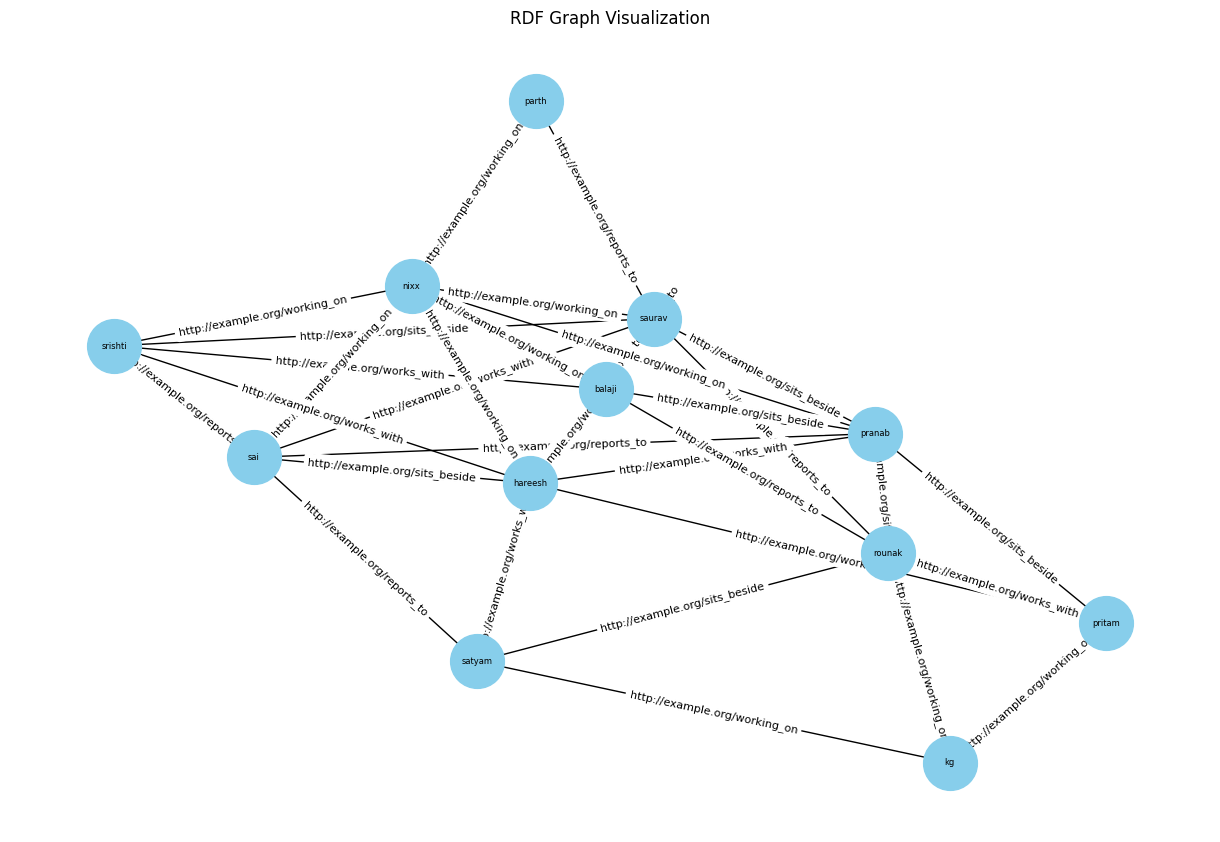

In [67]:
nx_graph = nx.Graph()


for subject, predicate, obj in g:
    nx_graph.add_node(subject)
    nx_graph.add_node(obj)
    nx_graph.add_edge(subject, obj, label=predicate)


pos = nx.spring_layout(nx_graph)
labels = {node: node.split("/")[-1] for node in nx_graph.nodes()}
edge_labels = {(source, target): data["label"] for source, target, data in nx_graph.edges(data=True)}

plt.figure(figsize=(12, 8))
nx.draw(nx_graph, pos, with_labels=True, labels=labels, node_size=1500, node_color=random.choice(colors), font_size=6)
nx.draw_networkx_edge_labels(nx_graph, pos, edge_labels=edge_labels, font_size=8, label_pos=0.5)
plt.title("RDF Graph Visualization")
plt.axis("off")
plt.show()


In [55]:
from rdflib.plugins.sparql import prepareQuery

query = prepareQuery("""
    SELECT ?s ?p ?o
    WHERE {        ?s ?p ?o .
    }
""")

# Execute the query and print results
for row in g.query(query):
    print(row)

(rdflib.term.URIRef('http://example.org/satyam'), rdflib.term.URIRef('http://example.org/working_on'), rdflib.term.URIRef('http://example.org/kg'))
(rdflib.term.URIRef('http://example.org/parth'), rdflib.term.URIRef('http://example.org/sits_beside'), rdflib.term.URIRef('http://example.org/saurav'))
(rdflib.term.URIRef('http://example.org/pritam'), rdflib.term.URIRef('http://example.org/reports_to'), rdflib.term.URIRef('http://example.org/pranab'))
(rdflib.term.URIRef('http://example.org/balaji'), rdflib.term.URIRef('http://example.org/sits_beside'), rdflib.term.URIRef('http://example.org/saurav'))
(rdflib.term.URIRef('http://example.org/parth'), rdflib.term.URIRef('http://example.org/working_on'), rdflib.term.URIRef('http://example.org/nixx'))
(rdflib.term.URIRef('http://example.org/rounak'), rdflib.term.URIRef('http://example.org/working_on'), rdflib.term.URIRef('http://example.org/kg'))
(rdflib.term.URIRef('http://example.org/srishti'), rdflib.term.URIRef('http://example.org/sits_bes